<a href="https://colab.research.google.com/github/ohazem1/Bachelor-Project/blob/main/Bachelor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing** 

In [ ]:
# installing
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing pandas, nltk, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string

import nltk
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_val_score


import re
import string
import sys
import argparse
from nltk.tokenize import word_tokenize


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d abedkhooli/arabic-100k-reviews -p /content/drive/MyDrive/Kaggle_dataset

arabic-100k-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Kaggle_dataset/arabic-100k-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Kaggle_dataset')


In [ ]:
import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Kaggle_dataset/ar_reviews_100k.tsv', sep='\t')

# Writing the DataFrame to a CSV file
df.to_csv('output_file.csv', index=False)
df.head()

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


# Data Understanding 

In [ ]:
# exploring the dataset
df.head(10)

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
5,Positive,أسلوب الكاتب رائع جدا و عميق جدا، قرأته عدة مر...
6,Positive,استثنائي. الهدوء في الجناح مع مسبح. عدم وجود ع...
7,Positive,الكتاب هو السيرة الذاتية للحداثة في المملكة بل...
8,Positive,من أجمل ما قرأت.. رواية تستحق القراءة فعلا..
9,Positive,بشكل عام جيده .. . التجاوب جيد جدا من قبل موظف...


In [ ]:
df.describe()

,label,text
count,99999,99999
unique,3,99999
top,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
freq,33333,1


In [ ]:
df.shape

(99999, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   99999 non-null  object
 1   text    99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
# checking for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

# Data Cleaning & Preprocessing 

In [ ]:
# importing stopwords in the arabic language
nltk.download('stopwords')
ar_stop_words = stopwords.words('arabic')
print(ar_stop_words)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# removing stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in ar_stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(remove_stopwords)
df.tail()


,label,text
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني البد...
99995,Negative,يستحق ان يكون بوكنق لانه سيئ . شي. يوجد خدمة ا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى قصه سرد لحاله ...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...
99998,Negative,ارجع إليه مرة اخرى . قربه البحر. المكان قديم ت...


In [ ]:
#punctuation
ar_punc = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
eng_punc = string.punctuation
ar_eng_punc = ar_punc + eng_punc

print(ar_eng_punc)

`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Acknoweldgement: the code in this cell was constructed by the help of 
# the following github repo "https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py"

# Removing punctuation from the dataframe
def remove_punctuations(text):
    translator = str.maketrans('', '', ar_eng_punc)
    return text.translate(translator)

df['text'] = df['text'].apply(remove_punctuations)
df.head()

,label,text
0,Positive,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ...
1,Positive,أسباب نجاح الإمارات شخص الدولة يعشق ترابها نحب...
2,Positive,هادفة وقوية تنقلك صخب شوارع القاهرة الى هدوء ...
3,Positive,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق...
4,Positive,ياسات جلوريا جزء يتجزأ دبي فندق متكامل الخدما...


In [ ]:
# Acknoweldgement: the code in this cell was constructed by the help of 
# the following github repo "https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py"

# removing diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

df['text'] = df['text'].apply(remove_diacritics)
df.head(10)

,label,text
0,Positive,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ...
1,Positive,أسباب نجاح الإمارات شخص الدولة يعشق ترابها نحب...
2,Positive,هادفة وقوية تنقلك صخب شوارع القاهرة الى هدوء ...
3,Positive,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق...
4,Positive,ياسات جلوريا جزء يتجزأ دبي فندق متكامل الخدما...
5,Positive,أسلوب الكاتب رائع جدا عميق جدا قرأته عدة مرات ...
6,Positive,استثنائي الهدوء الجناح مسبح عدم وجود عازل جيد ...
7,Positive,الكتاب السيرة الذاتية للحداثة المملكة بلسان أب...
8,Positive,أجمل قرأت رواية تستحق القراءة فعلا
9,Positive,بشكل عام جيده التجاوب جيد جدا موظفي الاستقبا...


In [ ]:
# checking for emojis
df_copy = df.copy()

import pandas as pd
import re

def contains_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

    # Check if the text contains any emojis
    return bool(emoji_pattern.search(text))


df_copy['contains'] = df_copy['text'].apply(contains_emoji)

df_copy.head()

,label,text,contains
0,Positive,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ...,False
1,Positive,أسباب نجاح الإمارات شخص الدولة يعشق ترابها نحب...,False
2,Positive,هادفة وقوية تنقلك صخب شوارع القاهرة الى هدوء ...,False
3,Positive,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق...,False
4,Positive,ياسات جلوريا جزء يتجزأ دبي فندق متكامل الخدما...,False


In [ ]:
# checking for emojis
df_copy['contains'].value_counts()

# dataframe does not contain any emojis 

False    99999
Name: contains, dtype: int64

In [ ]:
nltk.download('punkt')
df['text'] = df['text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text
0,Positive,"[ممتاز, نوعا, النظافة, والموقع, والتجهيز, والش..."
1,Positive,"[أسباب, نجاح, الإمارات, شخص, الدولة, يعشق, ترا..."
2,Positive,"[هادفة, وقوية, تنقلك, صخب, شوارع, القاهرة, الى..."
3,Positive,"[خلصنا, مبدئيا, اللي, مستني, ابهار, زي, الفيل,..."
4,Positive,"[ياسات, جلوريا, جزء, يتجزأ, دبي, فندق, متكامل,..."


In [ ]:
# stemming 
import nltk
nltk.download('punkt')

from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()

df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# EDA


In [ ]:
df['label'].value_counts()

Positive    33333
Mixed       33333
Negative    33333
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

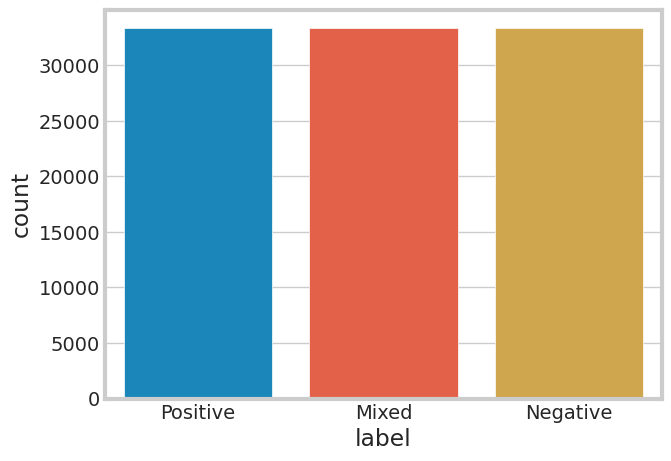

In [ ]:
sns.countplot(x = 'label', data = df)

# Modeling (Multinomial Naive Bayes)

In [ ]:
# Taking a copy of the dataframe to try applying the model using two approaches 
df_copy2 = df.copy()

#The first approach is Dropping or Removing 'mixed label' as it affects the model accuracy
df['label']=df['label'].replace("Mixed",np.NaN)
df=df.dropna()
df.head()

,label,text
0,Positive,"[متز, نوع, نظف, وقع, جهز, شاطيء, طعم]"
1,Positive,"[سبب, نجح, امر, شخص, دول, عشق, ترب, نحب, امر, ..."
2,Positive,"[هدف, وقي, نقل, صخب, شرع, قهر, الى, هدء, جبل, ..."
3,Positive,"[خلص, بدئ, الل, مست, بهر, زي, فيل, زرق, ميقراش..."
4,Positive,"[ياس, جلر, جزء, جزأ, دبي, ندق, كامل, خدم, ريح,..."


In [ ]:
# 1st dataframe with the 3 labels (positive,mixed,negative)
df_copy2['label'].value_counts()

Positive    33333
Mixed       33333
Negative    33333
Name: label, dtype: int64

In [ ]:
# 2nd dataframe without the mixed labels (positive,negative)
df['label'].value_counts()

Positive    33333
Negative    33333
Name: label, dtype: int64

In [ ]:
### split data to train and test for the 1st dataframe
from sklearn.model_selection import train_test_split

x1 = df_copy2['text'] #Independent Variable
y1 = df_copy2['label'] #Dependent Variable

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)
print(len(x1_train))
print(len(y1_train))
print(len(x1_test))
print(len(y1_test))

69999
69999
30000
30000


In [ ]:
### split data to train and test for the 2nd dataframe 
from sklearn.model_selection import train_test_split

x2 = df['text'] #Independent Variable
y2 = df['label'] #Dependent Variable

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3)
print(len(x2_train))
print(len(y2_train))
print(len(x2_test))
print(len(y2_test))

46666
46666
20000
20000


In [ ]:
#applying bag of words (BOW) for the 1st dataframe
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of tokens back to a string
x1_train_str = [' '.join(tokens) for tokens in x1_train]
x1_test_str = [' '.join(tokens) for tokens in x1_test]

count_vect = CountVectorizer(max_features=15000, ngram_range=(2, 3))

cv_train_reviews1 = count_vect.fit_transform(x1_train_str) #transformed train reviews

cv_test_reviews1 = count_vect.transform(x1_test_str) #transformed test reviews

print('BOW_cv_train:', cv_train_reviews1.shape)
print('BOW_cv_test:', cv_test_reviews1.shape)


BOW_cv_train: (69999, 15000)
BOW_cv_test: (30000, 15000)


In [ ]:
#applying bag of words (BOW) for the 2nd dataframe
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of tokens back to a string
x2_train_str = [' '.join(tokens) for tokens in x2_train]
x2_test_str = [' '.join(tokens) for tokens in x2_test]

count_vect = CountVectorizer(max_features=15000, ngram_range=(2, 3))

cv_train_reviews2 = count_vect.fit_transform(x2_train_str) #transformed train reviews

cv_test_reviews2 = count_vect.transform(x2_test_str) #transformed test reviews

print('BOW_cv_train:', cv_train_reviews2.shape)
print('BOW_cv_test:', cv_test_reviews2.shape)


BOW_cv_train: (46666, 15000)
BOW_cv_test: (20000, 15000)


In [ ]:
# applying the model to the first dataframe
from sklearn.naive_bayes import MultinomialNB

mn_model1 = MultinomialNB()

mn_model1.fit(cv_train_reviews1, y1_train)

mn_y_pred1 = mn_model1.predict(cv_test_reviews1)

In [ ]:
# applying the model to the second dataframe
from sklearn.naive_bayes import MultinomialNB

mn_model2 = MultinomialNB()

mn_model2.fit(cv_train_reviews2, y2_train)

mn_y_pred2 = mn_model2.predict(cv_test_reviews2)

In [ ]:
# Evaluating the first model using Accuracy, Precision, Recall, F1-Score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy
accuracy = accuracy_score(y1_test, mn_y_pred1)
print("Accuracy:", accuracy)

# precision
precision = precision_score(y1_test, mn_y_pred1, average='macro')
print("Precision:", precision)

# recall
recall = recall_score(y1_test, mn_y_pred1, average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y1_test, mn_y_pred1, average='macro')
print("F1-score:", f1)


Accuracy: 0.5889333333333333
Precision: 0.5951729848755365
Recall: 0.5887820830633227
F1-score: 0.5910077820044776


In [ ]:
# Evaluating the second model using Accuracy, Precision, Recall, F1-Score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy
accuracy = accuracy_score(y2_test, mn_y_pred2)
print("Accuracy:", accuracy)

# precision
precision = precision_score(y2_test, mn_y_pred2, average='macro')
print("Precision:", precision)

# recall
recall = recall_score(y2_test, mn_y_pred2, average='macro')
print("Recall:", recall)

# F1-score
f1 = f1_score(y2_test, mn_y_pred2, average='macro')
print("F1-score:", f1)


Accuracy: 0.7858
Precision: 0.7865957549213072
Recall: 0.7858209829254291
F1-score: 0.7856595298294691


After Applying the model on the two dataframes, the fisrt one including the three labels (positive, mixed, negative) and the second one including only (positive and negative). the results had shown that removing the mixed label will lead to higher accuracy 

# Modeling (Logistic Regression)

In [ ]:
# Making a copy of the dataframe 
df_copy3 = df.copy()

df_copy3['label']=df_copy3['label'].replace("Mixed",np.NaN)
df_copy3=df_copy3.dropna()
df_copy3['label'].value_counts()

Positive    33333
Negative    33333
Name: label, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_copy3['text'], df_copy3['label'], test_size=0.3, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Convert tokenized data to string format
x_train_str = [' '.join(tokens) for tokens in X_train]
x_test_str = [' '.join(tokens) for tokens in X_test]

# Feature extraction
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train_str)
x_test_vec = vectorizer.transform(x_test_str)

In [ ]:
# Modeling
model = LogisticRegression()
model.fit(x_train_vec, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evaluating the model
y_pred = model.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.8236
Precision: 0.8215204909918828
Recall: 0.8279130087789306
F1 score: 0.8247043625161483


# K-Fold Cross Validation

in reference to : https://www.w3schools.com/python/python_ml_cross_validation.asp

In [ ]:
# Applying cross validation to the first Multinominal Naive Bayes model (positive,negative,mixed)
from sklearn.model_selection import cross_val_score, KFold

# K is the number of folds
k = 10  

kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(mn_model1, cv_train_reviews1, y1_train, cv=kf)


print(f"Cross Validation Scores: ", scores)
print()
print(f"Average CV Score: ", scores.mean())
print()
print(f"Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.58857143 0.58728571 0.58814286 0.58128571 0.59214286 0.58157143
 0.58171429 0.581      0.58342857 0.57865409]

Average CV Score:  0.5843796950584778

Number of CV Scores used in Average:  10


In [ ]:
# Applying cross validation to the second Multinominal Naive Bayes model (positive,negative)
from sklearn.model_selection import cross_val_score, KFold

# K is the number of folds
k = 10  

kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(mn_model2, cv_train_reviews2, y2_train, cv=kf)


print(f"\nCross Validation Scores: ", scores)
print()
print(f"Average CV Score: ", scores.mean())
print()
print(f"Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.79515749 0.78894365 0.78165845 0.78230126 0.79108635 0.78380116
 0.79104158 0.79682812 0.78804115 0.79211316]

Average CV Score:  0.7890972364260431

Number of CV Scores used in Average:  10
